In [1]:
#just importing the important modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output #just to remove previous result from display
import random

%matplotlib inline

In [2]:
data=pd.read_csv("auto-mpg.csv")#read our csv file whose name is auto-mpg.csv

In [3]:
data.head()#just to check our dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
data.describe()#to know about our datasets

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
data.corr()#to find correlation between various columns in our dataset

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [8]:
#here we are interested in only univariate 
target=data['mpg']
feature=data['displacement']

In [16]:
def line(m,x,c):#equation of line
    return m*x+c

def error(m,x,c,y):#mean square error function
    return np.mean((line(m,x,c)-y)**2)

def derivative_slope(m,x,c,y):#d(error)/dm=2*mean((y_predicted - y_actual)*x)
    return 2*np.mean((line(m,x,c)-y)*x)

def derivative_intercept(m,x,c,y):#d(error)/dc=2*mean(y_predicted - y_actual)
    return 2*np.mean(line(m,x,c)-y)

def accuracy(error,y):
    return 100 - (error/np.mean(y**2))*100



In [22]:

m=random.random()#take any random number as m
c=random.random()#take any random number as c
cost=[]
alpha=0.00001#learnig rate
for i in range(1000):
    cost.append(error(m,feature,c,target))#append current error in cost, just to plot and visualize it
    m=m-alpha*derivative_slope(m,feature,c,target)#m=m-learning_rate*d(error)/d(m)
    c=c-alpha*derivative_intercept(m,feature,c,target)#c=c-learning_rate*d(error)/d(c)
    clear_output(True)#just to remove the previous printed output from the display
    print(i," Current error : ", error(m,feature,c,target) , " Current Accuracy : ",accuracy(error(m,feature,c,target),target))
    
    
    
    
    
        
        
    
    

999  Current error :  287.80128232904883  Current Accuracy :  53.11699653890999


Text(0.5,1,'alpha=0.000001')

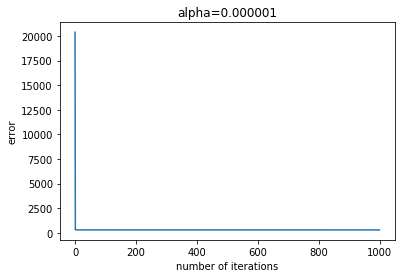

In [23]:
plt.plot(cost)
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("alpha=0.000001")